This notebook is an attempt to classify the dataset using a neural network with TensorFlow and Keras.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
data_path = 'twitter-hate-speech.csv'

df = pd.read_csv(data_path, encoding='latin1')
df = df.rename(columns={'does_this_tweet_contain_hate_speech': 'label',  
                        'does_this_tweet_contain_hate_speech:confidence': 'confidence' })

In [3]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,label,confidence,_created_at,orig__golden,orig__last_judgment_at,orig__trusted_judgments,orig__unit_id,orig__unit_state,_updated_at,orig_does_this_tweet_contain_hate_speech,does_this_tweet_contain_hate_speech_gold,does_this_tweet_contain_hate_speech_gold_reason,does_this_tweet_contain_hate_speechconfidence,tweet_id,tweet_text
0,853718217,True,golden,86,NaN,The tweet uses offensive language but not hate...,0.6013,NaN,True,NaN,0.0,615561535.0,golden,NaN,The tweet contains hate speech,The tweet contains hate speech\nThe tweet uses...,NaN,1.0,1.666196e+09,Warning: penny boards will make you a faggot
1,853718218,True,golden,92,NaN,The tweet contains hate speech,0.7227,NaN,True,NaN,0.0,615561723.0,golden,NaN,The tweet contains hate speech,The tweet contains hate speech\nThe tweet uses...,NaN,1.0,4.295121e+08,Fuck dykes
2,853718219,True,golden,86,NaN,The tweet contains hate speech,0.5229,NaN,True,NaN,0.0,615562039.0,golden,NaN,The tweet contains hate speech,The tweet contains hate speech\nThe tweet uses...,NaN,1.0,3.956238e+08,@sizzurp__ @ILIKECATS74 @yoPapi_chulo @brandon...
3,853718220,True,golden,98,NaN,The tweet contains hate speech,0.5184,NaN,True,NaN,0.0,615562068.0,golden,NaN,The tweet contains hate speech,The tweet contains hate speech\nThe tweet uses...,NaN,1.0,4.975147e+08,"""@jayswaggkillah: ""@JacklynAnnn: @jayswaggkill..."
4,853718221,True,golden,88,NaN,The tweet uses offensive language but not hate...,0.5185,NaN,True,NaN,0.0,615562488.0,golden,NaN,The tweet contains hate speech,The tweet contains hate speech\nThe tweet uses...,NaN,1.0,5.889236e+08,@Zhugstubble You heard me bitch but any way I'...


In [4]:
data = df[~df['_golden']].dropna(axis=1)

# Keras neural network with TensorFlow

In [5]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
import keras

Using TensorFlow backend.


In [6]:
from keras.preprocessing import sequence
from keras.preprocessing.text import text_to_word_sequence, one_hot, Tokenizer
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM

from sklearn.metrics import classification_report, confusion_matrix

In [7]:
X = data['tweet_text'].tolist()

# Encode labels
mapping = {l: i for i, l in enumerate(sorted(data['label'].unique()))}
reverse_mapping = {i: l for l, i in mapping.items()}

label_names = sorted(mapping.keys())
y = data['label'].map(lambda x: mapping[x])
y = to_categorical(y, num_classes=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [8]:
max_features = 4000
maxlen = 30
batch_size = 32

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)

X_train shape: (11553, 30)
X_test shape: (2889, 30)
y_train shape: (11553, 3)


In [9]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(3, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         512000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387       
Total params: 643,971
Trainable params: 643,971
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=30,
          validation_data=(X_test, y_test));

Train on 11553 samples, validate on 2889 samples
Epoch 1/30
11553/11553 [==============================] - 21s - loss: 0.6829 - acc: 0.7003 - val_loss: 0.5104 - val_acc: 0.7781
Epoch 2/30
11553/11553 [==============================] - 16s - loss: 0.4571 - acc: 0.7911 - val_loss: 0.4674 - val_acc: 0.7899
Epoch 3/30
11553/11553 [==============================] - 16s - loss: 0.3936 - acc: 0.8161 - val_loss: 0.4789 - val_acc: 0.7958
Epoch 4/30
11553/11553 [==============================] - 18s - loss: 0.3581 - acc: 0.8389 - val_loss: 0.4977 - val_acc: 0.7972
Epoch 5/30
11553/11553 [==============================] - 16s - loss: 0.3291 - acc: 0.8511 - val_loss: 0.5127 - val_acc: 0.7930
Epoch 6/30
11553/11553 [==============================] - 16s - loss: 0.3007 - acc: 0.8638 - val_loss: 0.5515 - val_acc: 0.7709
Epoch 7/30
11553/11553 [==============================] - 16s - loss: 0.2771 - acc: 0.8764 - val_loss: 0.5817 - val_acc: 0.7736
Epoch 8/30
11553/11553 [==============================]

2880/2889 [============================>.] - ETA: 0s
Test score: 1.33836409898 Test accuracy: 0.752163378373

              precision    recall  f1-score   support

          0       0.45      0.43      0.44       476
          1       0.91      0.91      0.91      1451
          2       0.67      0.68      0.67       962

avg / total       0.75      0.75      0.75      2889



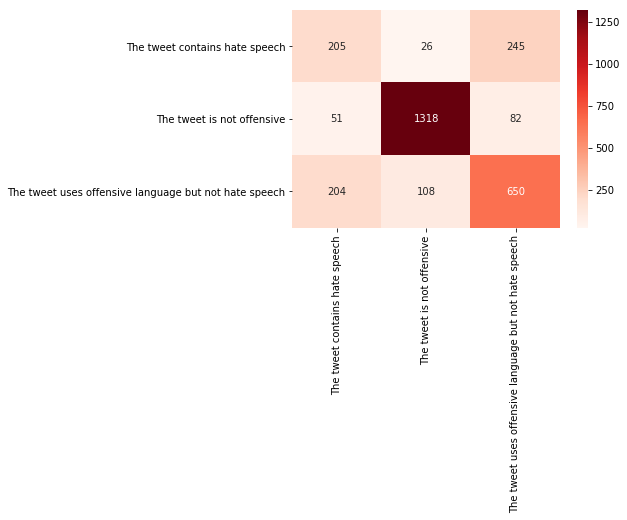

In [11]:
score, acc = model.evaluate(X_test, y_test, batch_size=batch_size)
print('\nTest score:', score, 'Test accuracy:', acc)

pred_probas = model.predict(X_test)
pred_labels = np.argmax(pred_probas, axis=1)
true_labels = np.argmax(y_test, axis=1)
print('\n', classification_report(true_labels, pred_labels))

cnf = confusion_matrix(true_labels, pred_labels)
sns.heatmap(cnf, annot=True, fmt='d', xticklabels=label_names, yticklabels=label_names, cmap="Reds");